## **Loss-функция / функция потерь нейронной сети** ( **функция ошибки**) – математическая дифференцируемая функция, характеризующая разницу между «истинным» значением целевой переменной и предсказанным нейронной сетью значением.

Актуально для такой нейронной сети, которая обучается с использованием обучающего набора (датасета), который содержит примеры с истинными значениями: тегами, классами, показателями.

Рассмотрим такие функции, как:

- средняя абсолютная MAE
- среднеквадратичная MSE
- категориальная кроссэнтропия
- бинарная кроссэнтропия

## Средняя абсолютная ошибка  (**mean absolute error MAE**)

Средняя абсолютная ошибка представляет из себя модуль разности двух значений.  Если сеть обучается на наборе данных (а не на одном примере), для подсчета ошибки берется среднее значение по всем примерам.

Чтобы рассчитать MAE, надо взять разницу между предсказанными значениями и истинными, усреднить по всему набору данных.

images_0.png

где n = кол-во наблюдений, Yt - истинное значение, Yp - прогнозируемое значение

## Пример подсчета MAE

Рассмотрим простой пример подсчета средней абсолютной ошибки. Для этого вручную создадим два набора данных, которые будут соответствовать правильным ответам (y_true) и результатам работы нейронной сети (y_pred):

In [ ]:
import numpy as np
y_true = np.array([15, 19, 11, -22, 23, -8, 18, 8, 9, -7, 17])
y_pred = np.array([12, 11, 7, -11, 12, -17, 10, 7, 1, -2, 11])

Посчитаем ошибку по указанной выше формуле:

In [ ]:
abs_ = abs(y_true - y_pred)             # Получение вектора, содержащего модуль разности двух исходных наборов данных
mae = abs_.sum()/len(y_true)            # Получение среднего значения ошибки
print(mae)

6.7272727272727275


Та же самая функция ошибки, но на другом примере.  Потенциальная нейронная сеть дала более качественные результаты:

In [ ]:
import numpy as np
y_true = np.array([15, 19, 11, -22, 23, -8, 18, 8, 9, -7, 17])
y_pred = np.array([14, 20, 11, -20, 21, -7, 17, 8, 7, -6, 15])

abs_ = abs(y_true - y_pred)
mae = abs_.sum()/len(y_true)
print(mae)

1.1818181818181819


Как видим, чем точнее финальный результат (y_pred ближе к y_true), тем меньше значение ошибки.

In [ ]:
# Проверим расчеты встроенными методами tensorflow:

import tensorflow as tf
tf.keras.losses.mean_absolute_error(y_true, y_pred)

<tf.Tensor: shape=(), dtype=int64, numpy=6>

In [ ]:
# Пример использования средней абсолютной ошибки в Keras'e:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
model.compile(loss='mean_absolute_error', optimizer='adam') # альтернативный вариант loss='mae'

# **Среднеквадратичная ошибка (mean squared error MSE)**

Средняя квадратичная ошибка (MSE): средняя квадратичная ошибка является наиболее распространенной функцией потерь. Функция потерь MSE широко **используется** в линейной регрессии в качестве показателя эффективности (в паре с функцией активации linear).

Чтобы рассчитать MSE, надо взять разницу между предсказанными значениями и истинными, возвести ее в квадрат и усреднить по всему набору данных.


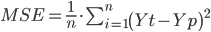

где n = кол-во наблюдений, Yt - истинное значение, Yp - прогнозируемое значение

## Пример подсчета

Рассмотрим простой пример подсчета среднеквадратичной ошибки. Для этого вручную создадим два набора данных, которые будут соответствовать правильным ответам (y_true) и результатам работы нейронной сети (y_pred):

In [ ]:
import numpy as np
y_true = np.array([15, 19, 11, -22, 23, -8, 18, 8, 9, -7, 17])
y_pred = np.array([12, 11, 7, -11, 12, -17, 10, 7, 1, -2, 11])

Посчитаем ошибку по указанной выше формуле:

In [ ]:
sqr_ = abs(y_true - y_pred)**2             # Получение вектора, содержащего модуль разности двух исходных наборов данных
mse = sqr_.sum()/len(y_true)            # Получение значения ошибки
print(mse)

54.72727272727273


Та же самая функция ошибки, но на другом примере.  Потенциальная нейронная сеть дала более качественные результаты:

In [ ]:
import numpy as np
y_true = np.array([15, 19, 11, -22, 23, -8, 18, 8, 9, -7, 17])
y_pred = np.array([14, 20, 11, -20, 21, -7, 17, 8, 7, -6, 15])

sqr_ = abs(y_true - y_pred)**2
mse = sqr_.sum()/len(y_true)
print(mse)

1.9090909090909092


In [ ]:
# Проверим расчеты встроенными методами tensorflow:

import tensorflow as tf
tf.keras.losses.mean_squared_error(y_true, y_pred)

<tf.Tensor: shape=(), dtype=int64, numpy=1>

In [ ]:
# Пример использования среднеквадратичной ошибки в Keras'e:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam') # альтернативный вариант loss='mse'

№# Кросс-энтропия (**categorical crossentropy ССЕ**)

Кросс-энтропия (или логарифмическая функция потерь – log loss). Кросс-энтропия измеряет расхождение между двумя вероятностными распределениями. Если кросс-энтропия велика, это означает, что разница между двумя распределениями велика, а если кросс-энтропия мала, то распределения похожи друг на друга.

Кросс-энтропия определяется как:

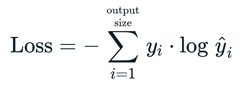

где:
- output size - количество наблюдений
- Yi - истинное значение
- ^Yi - прогнозируемое значение

Используется в мультиклассовой классификации, в паре с функцией активации softmax

## Пример подсчета

Рассмотрим простой пример подсчета средней абсолютной ошибки. Для этого вручную создадим два набора данных, которые будут соответствовать правильным ответам (y_true) и результатам работы нейронной сети (y_pred):

In [ ]:
import numpy as np

y_true = np.array([[0, 0, 1, 0], [1, 0, 0, 0]])
y_pred = np.array([[0.02, 0.07, 0.9, 0.01], [0.91, 0.03, 0.04, 0.02]])

In [ ]:
y_true.shape

(2, 4)

Посчитаем значение ошибки по указанной выше формуле:

In [ ]:
cce_ = - sum(y_true * np.log(y_pred))
print(cce_)

[ 0.09431068 -0.          0.10536052 -0.        ]


In [ ]:
# Проверим расчеты встроенными методами tensorflow:

import tensorflow as tf
tf.losses.categorical_crossentropy(y_true, y_pred)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.10536052, 0.09431068])>

Мы получили результирующий вектор из двух значений, поскольку входной набор состоит из двух элементов. Для получения результирующего значения ошибки нам необходимо получить среднее значение:

In [ ]:
cce_ = sum(cce_) / len(cce_)
print(cce_)

0.04991779878226689


In [ ]:
# Пример использования категориальной кроссэнтропии в Keras'e:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

## Бинарная классификация (**binary crossentropy BCE**)


Это функция ошибок, которую можно использовать для количественной оценки разницы между двумя распределениями вероятностей. Она говорит о том, что если у нас есть события и вероятности, насколько вероятно, что события произойдут на основе вероятностей? Если это очень вероятно, у нас малая кросс-энтропия, а если маловероятно, у нас высокая кросс-энтропия.

Формула имеет вид:

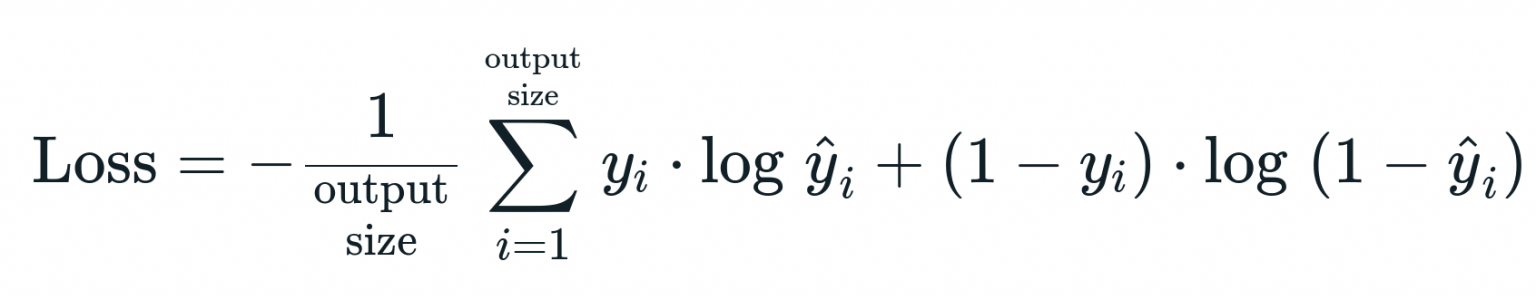

где:
- output size - количество наблюдений
- Yi - истинное значение
- ^Yi - прогнозируемое значение

При двоичной классификации каждая предсказанная вероятность сравнивается с фактическим значением класса (0 или 1), и вычисляется оценка, которая штрафует вероятность на основе расстояния от ожидаемого значения.

Используется в задачах бинарной классификации, в паре с функцией активации sigmoid

## Пример подсчета

Рассмотрим простой пример подсчета средней абсолютной ошибки. Для этого вручную создадим два набора данных, которые будут соответствовать правильным ответам (y_true) и результатам работы нейронной сети (y_pred):

In [ ]:
import numpy as np
y_true = np.array([0, 0, 1, 0])
y_pred = np.array([0.02, 0.07, 0.9, 0.01])

Посчитаем ошибку по указанной выше формуле:

In [ ]:
bce_ = -((y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_pred))).sum()/len(y_true)
print(bce_)

0.05204606291592068


In [ ]:
# Проверим расчеты встроенными методами tensorflow:

import tensorflow as tf
tf.losses.binary_crossentropy(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.05204595749369875>

In [ ]:
# Пример использования бинарной кроссэнтропии в Keras'e:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam')